# k-NN
This notebook will contain my attempts at running k-NN algorithmm on both of eBoss and ManGa datasets.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, auc, roc_auc_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier

## eBoss Data

Reading in the eboss data

In [3]:
raw_data_eBoss = pd.read_csv("../../../Data/Astronomy.csv")

Taking out the id column

In [4]:
trainable_data = raw_data_eBoss.iloc[:, 1:].copy(deep=True)

Seperating the X, and Y variables, and doing needed preprocessing.

In [5]:
X = trainable_data.iloc[:, :-1].copy(deep=True)
Y = trainable_data.iloc[:, -1:].copy(deep=True)
X = X.apply(pd.to_numeric, args={'errors': 'coerce'})
X = X.fillna('0')
Y = Y.Hits.map({'bad': 0, 'good': 1})

ss = MinMaxScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
X = X_scaled

In [6]:
# Defining all the scoring metrics that we need to keep track of.
scoring_dict = {
    'precision (no)': make_scorer(precision_score, pos_label=0),
    'precision (yes)': make_scorer(precision_score, pos_label=1),
    'recall (no)': make_scorer(recall_score, pos_label=0),
    'recall (yes)': make_scorer(recall_score, pos_label=1),
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(auc),
    'roc_auc': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score),
}

# Setting up the params.
params_grid = {'n_neighbors': [4,5,6,7,8]}

# Running the cross-validation on the k-NN with 10 folds.
grid_clf = GridSearchCV(KNeighborsClassifier(),
                        cv=KFold(n_splits=10, shuffle=True),
                        param_grid=params_grid,
                        scoring=scoring_dict,
                        refit='accuracy', 
                        return_train_score=False).fit(X,Y)

# Extracting relevant metrics. More detailed metrics are available in the cv_results_ object.
relevant_metric = {'mean_test_{}'.format(k): grid_clf.cv_results_['mean_test_{}'.format(k)] for k in scoring_dict.keys()}
relevant_metric['params'] = grid_clf.cv_results_['params']
relevant_metric

{'mean_test_precision (no)': array([0.82359538, 0.82728351, 0.76642942, 0.86120996, 0.78149466]),
 'mean_test_precision (yes)': array([0.92751597, 0.86086804, 0.89657177, 0.85441771, 0.86681226]),
 'mean_test_recall (no)': array([0.73655775, 0.5024264 , 0.65483662, 0.48562493, 0.54162623]),
 'mean_test_recall (yes)': array([0.95430028, 0.96900174, 0.94351831, 0.9771702 , 0.9561852 ]),
 'mean_test_accuracy': array([0.90747331, 0.85765125, 0.87188612, 0.85765125, 0.85409253]),
 'mean_test_auc': array([0.69928826, 0.80071174, 0.80071174, 0.85053381, 0.85053381]),
 'mean_test_roc_auc': array([0.84542901, 0.73571407, 0.79917747, 0.73139756, 0.74890571]),
 'mean_test_f1': array([0.93971372, 0.90979102, 0.91706885, 0.91008498, 0.90722846]),
 'params': [{'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8}]}

In [7]:
for k,v  in relevant_metric.items():
    print(k, ": ", v[0])

mean_test_precision (no) :  0.823595384449477
mean_test_precision (yes) :  0.9275159743208636
mean_test_recall (no) :  0.7365577483015204
mean_test_recall (yes) :  0.9543002781314983
mean_test_accuracy :  0.9074733096085409
mean_test_auc :  0.699288256227758
mean_test_roc_auc :  0.8454290132165094
mean_test_f1 :  0.9397137201508593
params :  {'n_neighbors': 4}


In [8]:
grid_clf.best_score_, grid_clf.best_params_

(0.9074733096085409, {'n_neighbors': 4})

# Manga Data:

In [9]:
raw_data_Manga = pd.read_csv("../../../Data/Astronomy20000_Original.csv")

Seperating the X, and Y variables, and doing needed preprocessing.

In [10]:
X = raw_data_Manga.iloc[:, 1:-1].copy(deep=True)
Y = raw_data_Manga.iloc[:, [-1]].copy(deep=True)
X = X.fillna('0')
Y = Y.Hits.map({'bad': 0, 'good': 1})

Running the k-NN

In [11]:
# Defining all the scoring metrics that we need to keep track of.
scoring_dict = {
    'precision (no)': make_scorer(precision_score, pos_label=0),
    'precision (yes)': make_scorer(precision_score, pos_label=1),
    'recall (no)': make_scorer(recall_score, pos_label=0),
    'recall (yes)': make_scorer(recall_score, pos_label=1),
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(auc, reorder=True),
    'roc_auc': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score),
}

# Setting up the params.
params_grid = {'n_neighbors': [4,5,6,7,8]}

# Running the cross-validation on the k-NN with 10 folds.
grid_clf = GridSearchCV(KNeighborsClassifier(),
                        cv=KFold(n_splits=10, shuffle=True),
                        param_grid=params_grid,
                        scoring=scoring_dict,
                        refit='accuracy', 
                        return_train_score=False)
grid_clf.fit(X,Y)

# Extracting relevant metrics. More detailed metrics are available in the cv_results_ object.
relevant_metric = {'mean_test_{}'.format(k): grid_clf.cv_results_['mean_test_{}'.format(k)] for k in scoring_dict.keys()}
relevant_metric

{'mean_test_precision (no)': array([0.83975376, 0.85230457, 0.84166774, 0.84936824, 0.84020669]),
 'mean_test_precision (yes)': array([0.7659387 , 0.69934816, 0.77469676, 0.72487418, 0.77190094]),
 'mean_test_recall (no)': array([0.9537064 , 0.92556889, 0.9554458 , 0.9364561 , 0.95518852]),
 'mean_test_recall (yes)': array([0.45329959, 0.51820905, 0.46013625, 0.50112215, 0.45438887]),
 'mean_test_accuracy': array([0.8287322 , 0.82382647, 0.83171412, 0.8277222 , 0.83007888]),
 'mean_test_auc': array([0.5, 0.5, 0.5, 0.5, 0.5]),
 'mean_test_roc_auc': array([0.703503  , 0.72188897, 0.70779103, 0.71878912, 0.7047887 ]),
 'mean_test_f1': array([0.56920194, 0.5949931 , 0.57711228, 0.59220342, 0.57171903])}

# Trying PCA out to see if we are able to see some patterns.

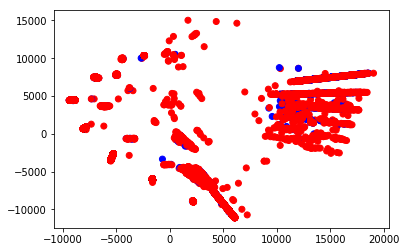

In [12]:
# running pca to see if we can get some good results.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
pca_X = pca.transform(X)
x1, x2 = np.split(pca_X, 2, axis=1)
pca_kNN = KNeighborsClassifier()
pca_kNN.fit(pca_X, Y)

#xx, yy = np.meshgrid(np.arange(x1.min(), x1.max(), 2.5),
#                    np.arange(x2.min(), x2.max(), 2.5))
#Z = pca_kNN.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)

# Doesnt look like it.
plt.scatter(x1, x2, c=Y.map({0:'red', 1: 'blue'}))

Doesn't seem like it.